<div style="width: 100%; margin-left: auto; margin-right: auto;">
    <h2 style="text-align: center; margin-top: 1%; font-size:32px;">Avaliação de Desempenho - Atividade 2</h2>
</div>

**Aluno:** Igor Carvalho da Silva  
**Email:** igor.carvalho@icomp.ufam.edu.br  
**Matrícula:** 21951288  

---

## Introdução
As filas têm uma frequente incidência no cotidiano, seja de uma forma mais perceptível como na compra de ingressos para um show ou cinema, em uma sala de espera de um consultório, ou ainda, de uma forma menos perceptível como no gerenciamento de documentos a serem impressos ou no buffer para gravação de dados em mídia. As filas são fenômenos naturais em um mundo compartilhado, além de ser uma das estruturas de dados mais utilizada na área de Computação.

Nesta atividade simulamos a dinâmica de uma fila M/M/1 a fim de estimar o tempo médio $\bar{X}(n)$ de espera de um cliente na fila. Para isso, foram realizados dois tipos de simulações, a primeira chamada de Simulação de Horizonte Finito, onde o fim da simulação é definido pelo usuário, como dado um tempo de simulação ou número de observações coletadas, por exemplo. Por sua vez, o segundo tipo de simulação realizado foi a chamada de Simulação de Horizonte Infinito, onde o fim da simulação ocorre quando uma determinada condição acontece, como por exemplo determinar um valor para a largura do intervalo de confiança.

Com isso, o experimento desta atividade foi dividido em três partes. A primeira consiste em realizar a Simulação de Horizonte Finito, onde será executada a simulação da fila para diferentes quantidades de clientes. A segunda e terceira parte consistem em realizar a Simulação de Horizonte Infinito, na segunda utilizando a regra de parada de Chow e Robbins e na terceira a regra do tamanho relativo do intervalo de confiança.

## Fila M/M/1
Uma fila M/M/1 é um modelo simples de simulador. O primeiro M indica que o tempo entre as chegadas dos clientes segue uma distribuição exponencial. O segundo M indica que o tempo de duração no serviço também segue uma distribuição exponencial. Por sua vez, o número 1 indica que há apenas um servidor atendendo todos os clientes desse sistema. O atendimento é realizado no modo FIFO (First In First Out), isto é, os clientes são atendidos na ordem em que forem chegando. 

Inicialmente, consideramos que não há clientes na fila e não há clientes sendo atendidos. Se não tiver ninguém na fila e nem no serviço, o cliente vai direto para o serviço, caso contrário o cliente tem que ir para a fila e é atendido quando o cliente que estava a sua frente sai do atendimento. Com isso, observamos que o tempo de espera do cliente é a diferença entre o instante que ele entra no atendimento e o instante que ele chegou no sistema.

Para obtermos o tempo de chegada ($T_{c}$) e o tempo de duração do atendimento ($T_{s}$) usaremos a geração de uma variável aleatória exponencial com média $\beta$, dada por 

$$
X = -\beta \times ln(1 - U)
$$

onde U é a geração de um número aleatório entre 0 e 1 que será fornecido por meio do uso do gerador de números aleatórios utilizado na linguagem de programação Python, que como observado na Atividade 1 obteve o melhor valor de estatística dado pelo Teste Chi-Quadrado ($X^{2}$).

Como proposto na descrição da atividade, consideramos que a taxa de chegada ($\lambda$) é de 9 clientes por segundo. Para encontrar o intervalo de tempo entre clientes podemos usar uma regra de 3: 

$$
1 \ segundo \longrightarrow 9 \ clientes \\
T_{c} \longrightarrow 1 \ cliente \\
T_{c} = 1/9 \ segundo
$$

Isso significa que chega 1 cliente a cada 1/9 segundo, isto é, $T_c$ é uma variável aleatória com média 1/9 ($\beta=1/9$).

O raciocínio é análogo para a taxa de serviço ($\mu$) que, como proposto na atividade, é de 10 clientes por segundo. Dessa forma,

$$
1 \ segundo \longrightarrow 10 \ clientes \\
T_{s} \longrightarrow 1 \ cliente \\
T_{s} = 1/10 \ segundo
$$

Isso significa que o atendimento de 1 cliente dura, em média, 1/10 segundo. Logo, $T_{s}$ é uma variável aleatória com média 1/10 ($\beta=1/10$)

## Experimento
### Dependências
Para reproduzir o experimento é necessário ter o `pip` instalado ou já possuir as bibliotecas instaladas.

In [ ]:
!pip3 install numpy
!pip3 install tqdm
!pip3 install scipy
!pip3 install statistics
!pip3 install matplotlib

### Imports

In [2]:
import random
import numpy as np
import matplotlib.pyplot as plt
from statistics import pstdev
from scipy.stats import t
from tqdm import tqdm
from math import sqrt

### Funções 

In [3]:
def generate_exponential_VA(beta):
    return -beta * np.log(1-random.random())

def mm1_simulator(N, lambda_, mu, debug=False):
    arrival_time = 0
    exit_time = 0
    waiting_times = []
    if debug:
        print(f'Simulação para {N} clientes')

    for _ in tqdm(range(N), disable=not debug):
        arrival_time += generate_exponential_VA(1/lambda_)
        service_time = generate_exponential_VA(1/mu)

        if arrival_time >= exit_time:
            waiting_times.append(0)
            exit_time = arrival_time + service_time
        else:
            waiting_times.append(exit_time - arrival_time)
            exit_time += service_time

    return waiting_times

def metrics(waiting_times, debug=False):
    if debug:
        print('Gerando métricas ... ', end='')
    mean = np.mean(waiting_times)
    standard_deviation = pstdev(waiting_times)
    t_ = t.ppf(0.95, N-1)
    h = (t_ * standard_deviation) / sqrt(N)
    if debug:
        print('done!')
    
    return (mean, h)
    

### Parte 1
* Implementar em Python uma fila M/M/1.
* Execute a simulação da fila M/M/1 gerando $n$ clientes
    * $n=10^{3}$, $n=10^{6}$, $n=10^{9}$
    * taxa de entrada: $\lambda=9$ clientes por segundo.
    * taxa de serviço: $\mu=10$ clientes por segundo.
* Calcule o tempo de espera $x_{i}$ na fila para cada cliente $i$.
* Estimar o tempo médio $\bar{X}(n)$ de espera na fila M/M/1
* Estimar o intervalo de confiança $H$ de $95\%$.
* Para cada valor de $n$, comparar com o valor esperado. Da Teoria das Filas, esse valor é dado por

$$
E[X]=\rho\frac{\frac{1}{\mu}}{1-\rho}, \ \ \ onde \ \rho=\frac{\lambda}{\mu}
$$

In [4]:
lambda_ = 9
mu = 10
rho = lambda_/mu 
expected_mean = rho*((1/mu)/(1-rho))

Diferente do prosposto na descrição da Parte 1 da atividade, por conta da limitação de memória RAM, não foi realizado o experimento para o número de clientes igual a 1 bilhão ($n=10^{9}$), ao invés disso o máximo conseguido foi de 100 milhões de clientes ($n=10^{8}$). Além disso, foi adicionada quantidades gradativas de clientes afins de termos uma observação melhor do tempo de espera na fila dado o crescimento do número de clientes.

In [4]:
avgs = []
confidence_interval = []
clients_amount = [10**3, 10**4, 10**5, 10**6, 10**7, 10**8]

for i, N in enumerate(clients_amount):
    waiting_times = mm1_simulator(N, lambda_, mu, debug=True)
    
    # calculate mean and confidence interval 
    mean, h = metrics(waiting_times, debug=True)
    avgs.append(mean)
    confidence_interval.append(h)


Simulação para 1000 clientes


100%|███████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 273976.35it/s]


Gerando métricas ... done!
Simulação para 10000 clientes


100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 466936.52it/s]


Gerando métricas ... done!
Simulação para 100000 clientes


100%|███████████████████████████████████████████████████████████████████████| 100000/100000 [00:00<00:00, 554123.39it/s]


Gerando métricas ... done!
Simulação para 1000000 clientes


100%|█████████████████████████████████████████████████████████████████████| 1000000/1000000 [00:01<00:00, 525143.13it/s]


Gerando métricas ... done!
Simulação para 10000000 clientes


100%|███████████████████████████████████████████████████████████████████| 10000000/10000000 [00:21<00:00, 458716.47it/s]


Gerando métricas ... done!
Simulação para 100000000 clientes


100%|█████████████████████████████████████████████████████████████████| 100000000/100000000 [03:18<00:00, 503164.29it/s]


Gerando métricas ... done!


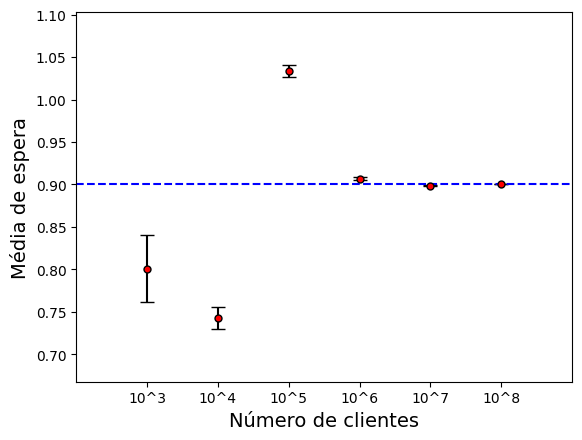

In [5]:
fig, ax = plt.subplots()

plt.errorbar([1,2,3,4,5,6], avgs, yerr=confidence_interval, fmt='o', mfc='red', mec='black', ms=5, ecolor='black', capsize=5)
plt.xticks([1,2,3,4,5,6], ['10^3','10^4','10^5','10^6','10^7','10^8'])
plt.margins(0.2)
plt.ylabel('Média de espera', fontsize=14)
plt.xlabel('Número de clientes', fontsize=14)

plt.axhline(y=expected_mean, color='b', linestyle='--')
plt.show()

### Parte 2
Em vez de parar a simulação depois de gerar n clientes, a simulação vai parar aplicando a regra de parada de Chow e Robbins.
Para isso, n deve crescer indefinidamente e a simulação deve parar quando o intervalo de confiança alcançar um determinado tamanho 2d. Registre o valor final de n. Faça esse experimento para 4 valores de d:  
* d = 20
* d = 8
* d = 4
* d = 1

Dado os valores da média do tempo de espera serem pequenos, como observado pelo cálculo usando a Teoria das Filas, a largura do intervalo de confiança tende a ser muito pequeno quando comparados com os valores de d propostos na Parte 2 da atividade. Como consequência, para um número pequeno de clientes a regra da parada de Chow e Robbins era satisfeita e a simulação encerrada. Com isso, foi optado por usar valores menores para d dividindo cada valor prosposto na atividade por $10^{4}$.

In [ ]:
for d in [20/10**4, 8/10**4, 4/10**4, 1/10**4]:
    N = 100
    waiting_times = mm1_simulator(N, lambda_, mu)
    mean, h = metrics(waiting_times)

    while(h >= d):
        N = N*2
        waiting_times = mm1_simulator(N, lambda_, mu)
        mean, h = metrics(waiting_times)
        
    print(f'Para d={d} o último valor de N foi {N}')

Para d=0.002 o último valor de N foi 819200
Para d=0.0008 o último valor de N foi 6553600
Para d=0.0004 o último valor de N foi 26214400


Por questão de tempo disponível o experimento foi interrompido no cálculo para $d=\frac{1}{10^{4}}$, mostrando que é necessário uma grande quantidade de clientes para diminuir a largura do intervalo de confiança para o valor desejado. Os valores obtidos até o momento de interrupção foram:
```
Para d=0.002 o último valor de N foi 819200
Para d=0.0008 o último valor de N foi 6553600
Para d=0.0004 o último valor de N foi 26214400
```

### Parte 3
Em vez de parar a simulação depois de gerar n clientes, a simulação vai parar aplicando a regra do tamanho relativo do intervalo de confiança. Para isso, n vai crescer indefinidamente. Calcular $\bar{X}(n)$ e o intervalo de confiança de 95%.  
Adotar precisão relativa $\gamma = 5\%$  
* Se $\frac{H}{\bar{X}(n)}\le \gamma$, para a simulação, anotar o valor de $\bar{X}(n)$, H e o valor de n.
* Caso contrário, a simulação continua 

In [8]:
N = 1

while True:
    waiting_times = mm1_simulator(N, lambda_, mu)
    mean, h = metrics(waiting_times)
    relative_size = h/mean
    
    if relative_size <= 0.05:
        print(f'''
            H: {h}
            N: {N}
            X(n): {mean}
        ''')
        break;
    N = N*2


            H: 0.048537995647230575
            N: 2048
            X(n): 1.2398309545232253
        


/tmp/ipykernel_621/471243159.py:6: RuntimeWarning: invalid value encountered in double_scalars
  relative_size = h/mean


## Conclusão
A atividade mostrou as dificuldades de simular uma fila, em questões de recursos computacionais disponíveis, como memória e a disponibilidade de tempo para aguardar a execução. Além disso, também na escolha dos parâmetros em simulações de horizonte finito, como mostrado na Parte 2 e 3 do experimento em escolher bons valores para $d$ na regra de parada de Chow e Robbins e na escolha do valor de $\gamma$  na regra do tamanho relativo. Apesar disso, é possível observar, conforme mostrado na Parte 1, que dada a taxa de chegada e de duração do serviço conseguimos estimar um tempo médio de espera em uma Fila M/M/1.